In [1]:
import torch

In [2]:
# case 1
N = 20
random0 = torch.randn(int(N/2), 1)
random5 = torch.randn(int(N/2), 1) + 5
class1_data = torch.hstack([random0, random5])
class2_data = torch.hstack([random5, random0])
class1_label = torch.ones(int(N/2), 1)
class2_label = torch.zeros(int(N/2), 1)
X = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])

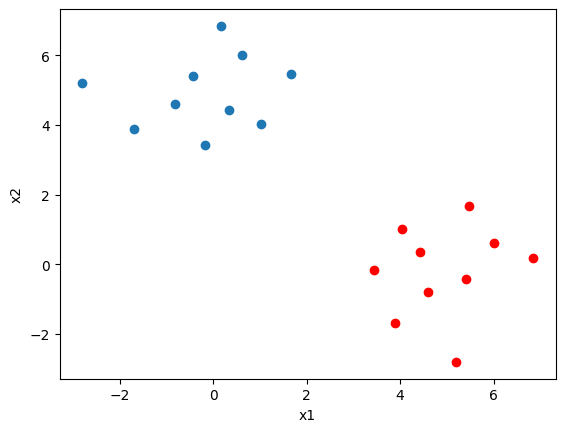

In [3]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0], class1_data[:,1], 'o')
plt.plot(class2_data[:,0], class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [7]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        # case1. plaine
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        
        # # case1. very simple
        # self.linear = nn.Sequential(nn.Linear(2, 1),
        #                         nn.Sigmoid())
        
        # # case1. deep
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())
    
    def forward(self, x):
        x = self.linear(x)
        return x

In [9]:
model = MLP()
print(model)
print(model(torch.randn(5, 2)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


In [ ]:
from torch import optim

LR = 1e-1

EPOCH = 100

optimizer = optim.Adam(model.parameters(), lr=LR)

criterion = nn.BCELoss()

loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH):
    # inference
    y_hat= model(X)
    
    # loss
    loss = criterion(y_hat, y)
    
    # update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
    
    # print loss
    loss_history += [loss.item()]
    print(f'Epoch: {ep +1}, train loss: {loss.item():.4f}')
    print('-' * 20)    

Epoch: 1, train loss: 0.8629
--------------------
Epoch: 2, train loss: 0.4132
--------------------
Epoch: 3, train loss: 0.0477
--------------------
Epoch: 4, train loss: 0.0167
--------------------
Epoch: 5, train loss: 0.0127
--------------------
Epoch: 6, train loss: 0.0085
--------------------
Epoch: 7, train loss: 0.0049
--------------------
Epoch: 8, train loss: 0.0026
--------------------
Epoch: 9, train loss: 0.0014
--------------------
Epoch: 10, train loss: 0.0008
--------------------
Epoch: 11, train loss: 0.0005
--------------------
Epoch: 12, train loss: 0.0003
--------------------
Epoch: 13, train loss: 0.0002
--------------------
Epoch: 14, train loss: 0.0001
--------------------
Epoch: 15, train loss: 0.0001
--------------------
Epoch: 16, train loss: 0.0001
--------------------
Epoch: 17, train loss: 0.0000
--------------------
Epoch: 18, train loss: 0.0000
--------------------
Epoch: 19, train loss: 0.0000
--------------------
Epoch: 20, train loss: 0.0000
----------